# Predicting Bank Customer Churn using Decision Tree Classifier

This notebook walks through a complete machine learning workflow to predict customer churn in a bank using a Decision Tree Classifier. The aim is to identify which customers are likely to leave the bank, enabling better retention strategie

## 1. Importing Libraries

We start by importing standard Python libraries for data handling (`pandas`, `numpy`), visualization (`matplotlib`, `seaborn`), and machine learning (`sklearn`).s.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay

## 2. Loading the Dataset

We load the dataset using `pandas.read_csv()` from a local file path. This dataset contains customer demographics and account-level information that may indicate churn behavior.

In [2]:
bank = pd.read_csv("Bank_churn.csv")

## 3. Exploratory Data Analysis (EDA)

We inspect the dataset using:
- `.head()` to view sample records,
- `.info()` to examine data types and nulls,
- `.describe()` for summary statistics.

This helps us understand variable types and identify missing or anomalous values.

In [5]:
bank.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


## 4. Data Preprocessing

We encode categorical variables using `LabelEncoder` so that machine learning algorithms can process them. Features and the target (`Exited`) are separated, and unnecessary columns are dropped.

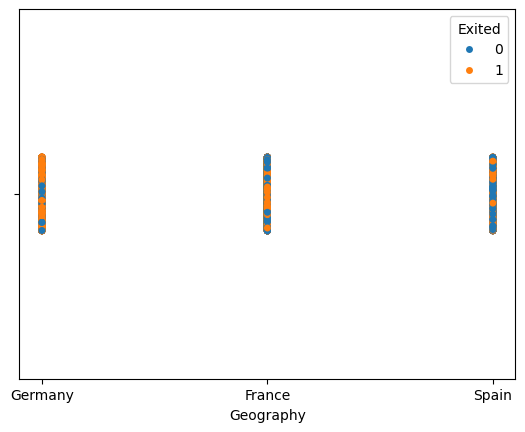

In [7]:
sns.stripplot(x = 'Geography', data = bank[(bank.NumOfProducts == 1) & (bank.Gender == 'Female') & (bank.Age >= 38)], hue = 'Exited')
plt.show()

In [9]:
X = bank[bank.Age >= 38][['Geography','NumOfProducts','Gender','Age']]
y = bank[bank.Age >= 38]['Exited']
X.shape, y.shape

((77437, 4), (77437,))

In [11]:
encoding = LabelEncoder()
columns = [['Geography', 'Gender']]
X['Geography'] = encoding.fit_transform(X["Geography"])
X['Gender'] = encoding.fit_transform(X["Gender"])

## 5. Splitting the Data

The dataset is split into training and testing sets using `train_test_split()` from scikit-learn, allowing us to evaluate the model on unseen data.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=10, test_size=11000)
X_train.shape, X_test.shape

((66437, 4), (11000, 4))

## 6. Training the Decision Tree Classifier

A `DecisionTreeClassifier` is instantiated and trained on the training set. This model is chosen for its interpretability and ability to handle both categorical and numerical features.

In [15]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=8, max_leaf_nodes=300)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7809090909090909

In [17]:
model.feature_importances_

array([0.06792567, 0.62196059, 0.05007091, 0.26004283])

In [19]:
model.get_depth(), model.get_n_leaves()

(8, 189)

## 7. Model Evaluation

We use `ConfusionMatrixDisplay` to visualize the performance of the model on the test set. Accuracy or other metrics may also be computed to assess predictive quality.


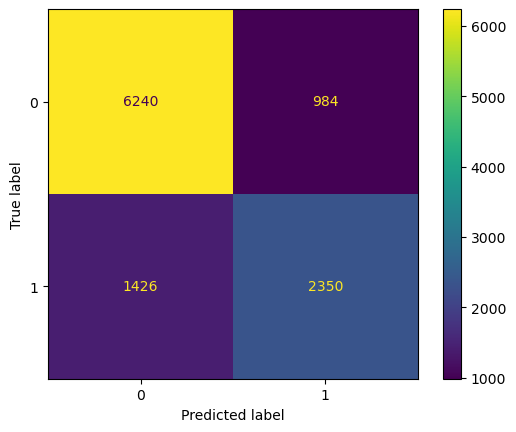

In [21]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

## 8. Conclusion and Next Steps

The Decision Tree model provides an interpretable baseline for predicting customer churn. Future enhancements may include:
- Feature importance analysis,
- Hyperparameter tuning,
- Testing ensemble models like Random Forests or Gradient Boosting.